<a href="https://colab.research.google.com/github/bharathreddy18/ML-Algorithms/blob/main/ML_Polynomial_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [6]:
df = pd.read_csv('Position_Salaries.csv')
df

,Position,Level,Salary
0,Business Analyst,1,45000
1,Junior Consultant,2,50000
2,Senior Consultant,3,60000
3,Manager,4,80000
4,Country Manager,5,110000
5,Region Manager,6,150000
6,Partner,7,200000
7,Senior Partner,8,300000
8,C-level,9,500000
9,CEO,10,1000000


In [7]:
X = df.iloc[:, 1]
y = df.iloc[:, -1]

In [8]:
X = X.values.reshape(-1, 1)

In [9]:
X.shape

(10, 1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

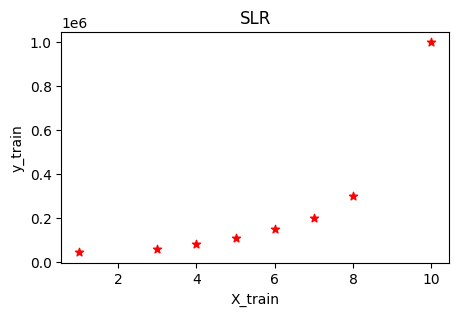

In [11]:
plt.figure(figsize=(5, 3))
plt.title('SLR')
plt.xlabel('X_train')
plt.ylabel('y_train')
plt.scatter(X_train, y_train, color='red', marker='*')
plt.show()

In [12]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)

LinearRegression()

In [13]:
# Train performance

y_train_pred = lin_reg.predict(X_train)

In [14]:
training_data = pd.DataFrame()
training_data['X_train'] = X_train.reshape(-1)
training_data['y_train'] = y_train
training_data['y_train_pred'] = y_train_pred
training_data

,X_train,y_train,y_train_pred
0,6,45000.0,287068.965517
1,1,NaN,-152370.689655
2,8,60000.0,462844.827586
3,3,80000.0,23405.172414
4,10,110000.0,638620.689655
5,5,150000.0,199181.034483
6,4,200000.0,111293.103448
7,7,300000.0,374956.896552


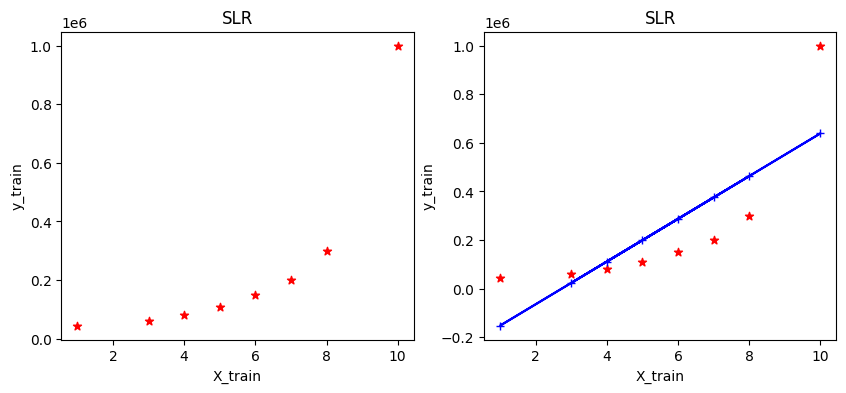

In [18]:
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("SLR")
plt.xlabel('X_train')
plt.ylabel("y_train")
plt.scatter(X_train, y_train, color='red', marker='*')

plt.subplot(1,2,2)
plt.title("SLR")
plt.xlabel('X_train')
plt.ylabel("y_train")
plt.scatter(X_train, y_train, color='red', marker='*')
plt.plot(X_train, y_train_pred, color='b', marker='+')
plt.show()

In [19]:
lin_reg.score(X_train, y_train)

0.6366049276570868

In [20]:
lin_reg.score(X_test, y_test)

0.8451346684575974

In [40]:
# Polynomial Linear Regression
from sklearn.preprocessing import PolynomialFeatures
poly_reg2 = PolynomialFeatures(degree=2)
poly_reg3 = PolynomialFeatures(degree=3)

X_train_poly2=poly_reg2.fit_transform(X_train)

In [44]:
X_train_poly3=poly_reg3.fit_transform(X_train)
X_train_poly3

array([[   1.,    6.,   36.,  216.],
       [   1.,    1.,    1.,    1.],
       [   1.,    8.,   64.,  512.],
       [   1.,    3.,    9.,   27.],
       [   1.,   10.,  100., 1000.],
       [   1.,    5.,   25.,  125.],
       [   1.,    4.,   16.,   64.],
       [   1.,    7.,   49.,  343.]])

In [36]:
lin_reg.fit(X_train_poly2, y_train)

LinearRegression()

In [39]:
lin_reg.predict(X_train_poly2)

array([143554.62125495, 114155.94968909, 442342.77840588,   2903.12323347,
       905147.32899943,  55666.69022046,   8782.85754664, 272446.65065008])

In [28]:
lin_reg.score(X_train_poly2, y_train)

0.928077628049796

In [29]:
lin_reg.fit(X_train_poly3, y_train)

LinearRegression()

In [30]:
lin_reg.score(X_train_poly3, y_train)

0.9913280453724184

In [41]:
y_train_pred2 = lin_reg.predict(X_train_poly2)
#y_train_pred3 = lin_reg.predict(X_train_poly3)

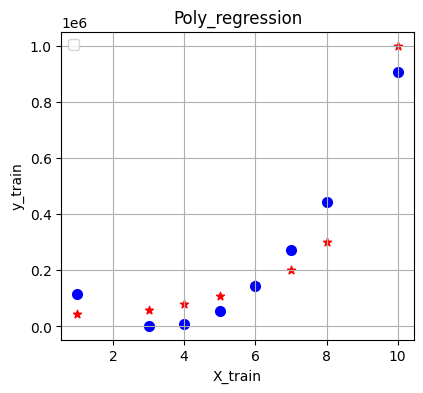

In [53]:
plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.title("Poly_regression")
plt.xlabel('X_train')
plt.ylabel("y_train")
plt.scatter(X_train, y_train, color='red', marker='*')
plt.scatter(X_train, y_train_pred2, color='b', linewidth=2)
plt.grid(True)
plt.legend()
plt.show()